# Capgemini Employee Happiness

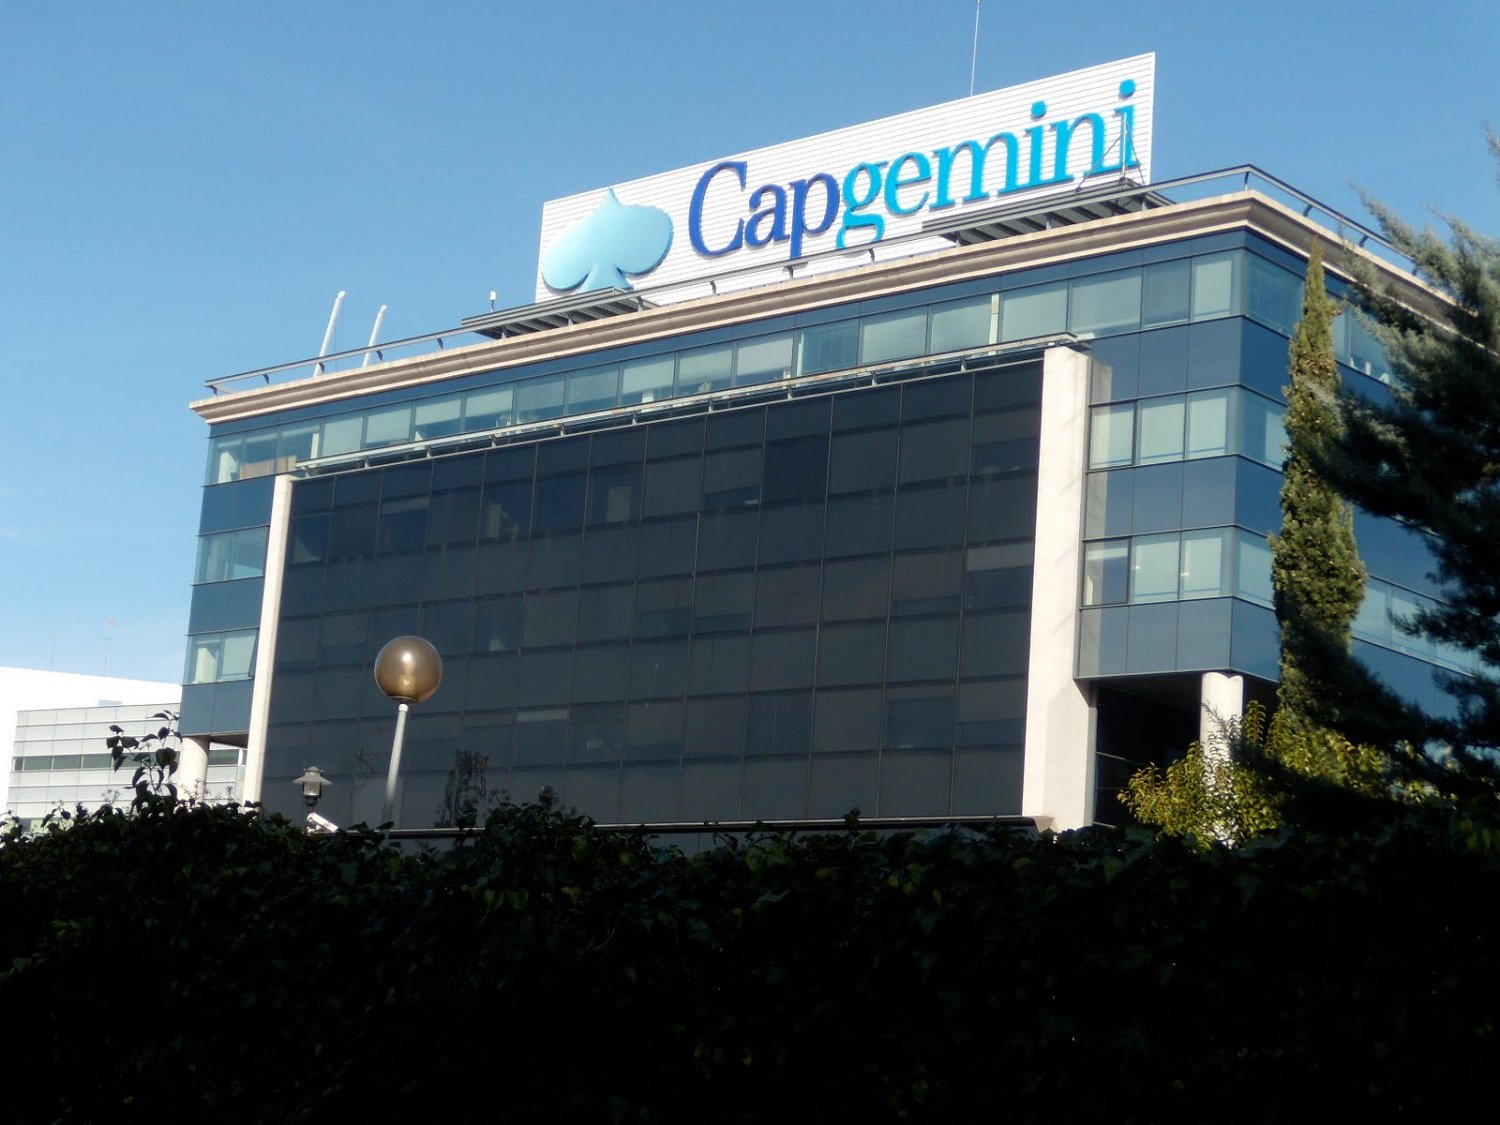

# Project Description:

Our team is excited to embark on this class project that places a strong focus on harnessing the power of machine learning techniques to delve into the realm of employee satisfaction within the Capgemini company. Our primary objective is to get valuable insights into the numerous factors that underlie employee satisfaction in this specific organization. Through this analysis, we aim to predict employee satisfaction ratings using a diverse set of machine learning techniques, including but not limited to sentiment analysis and classification algorithms.


The potential outcomes of this analysis hold significant promise for Capgemini and similar companies. By tapping into the predictive power of machine learning, our project has the capacity to significantly elevate employee morale and overall satisfaction. Furthermore, it could equip a company with the knowledge needed to make data-driven decisions and implement targeted strategies aimed at optimizing the working environment and enhancing the overall employee experience.
 

To facilitate this endeavor, we will be utilizing a Kaggle dataset that captures self-reported employee satisfaction data from within Capgemini. This dataset will serve as the foundational basis for our analysis. In our pursuit of comprehensive understanding, we may augment this primary dataset with additional relevant data sources. These supplementary datasets may include information on salary structures, demographics, and other factors that are not originally included in the core dataset. By incorporating this supplementary data, we aim to gain a more holistic perspective on the intricacies of employee satisfaction, and thereby refine the accuracy and depth of our predictive models.
 

By the conclusion of this project, we anticipate having not only a predictive model for employee satisfaction but also a wealth of knowledge that can empower Capgemini and similar enterprises to cultivate a more positive and productive work environment for their staff.


References:

 https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset

 

# The Model

The data is an extensive survey done at the Capgemini company to evaluate the overall employees' satisfaction in their jobs.

Here is an overview of the data:

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Capgemini_Employee_Reviews_from_AmbitionBox.csv')


In [82]:
df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [83]:
column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

,Columns
0,Title
1,Place
2,Job_type
3,Department
4,Date
5,Overall_rating
6,work_life_balance
7,skill_development
8,salary_and_benefits
9,job_security


# 1. Data Preparation - Jace Rhea and Yonghee Kim


## Analyzing the Dataset

In [84]:
import numpy as np

df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25912 non-null  object 
 1   Place                24597 non-null  object 
 2   Job_type             11556 non-null  object 
 3   Department           22083 non-null  object 
 4   Date                 25915 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    26977 non-null  float64
 7   skill_development    26976 non-null  float64
 8   salary_and_benefits  26947 non-null  float64
 9   job_security         26943 non-null  float64
 10  career_growth        26931 non-null  float64
 11  work_satisfaction    26909 non-null  float64
 12  Likes                23864 non-null  object 
 13  Dislikes             22966 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


The following features have missing data:


<Axes: >

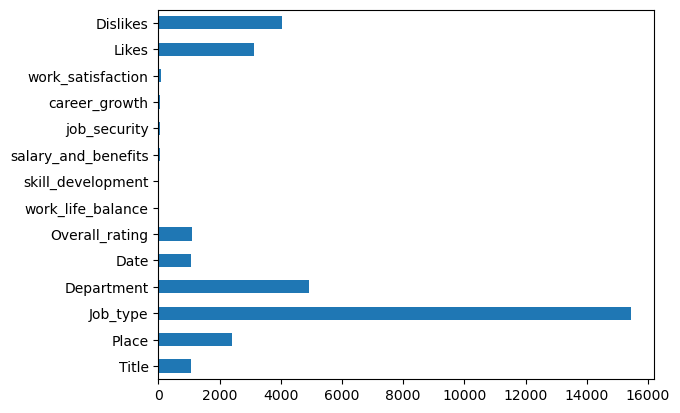

In [86]:
print (f"The following features have missing data:")
summation_missing = df.isnull().sum()
summation_missing.plot(kind='barh')

In [87]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

,Total Missing,Percent Missing
Job_type,15437,57.188901
Department,4910,18.189901
Dislikes,4027,14.918683
Likes,3129,11.591894
Place,2396,8.876375
Overall_rating,1095,4.056607
Title,1081,4.004742
Date,1078,3.993628
work_satisfaction,84,0.311192
career_growth,62,0.229689


In [88]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_of_data_missing = round((total_missing / total_cells) * 100, 2)
print(f"{percent_of_data_missing}% of the data is missing.")

8.85% of the data is missing.


### Ratings by Frequency

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2537028073.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


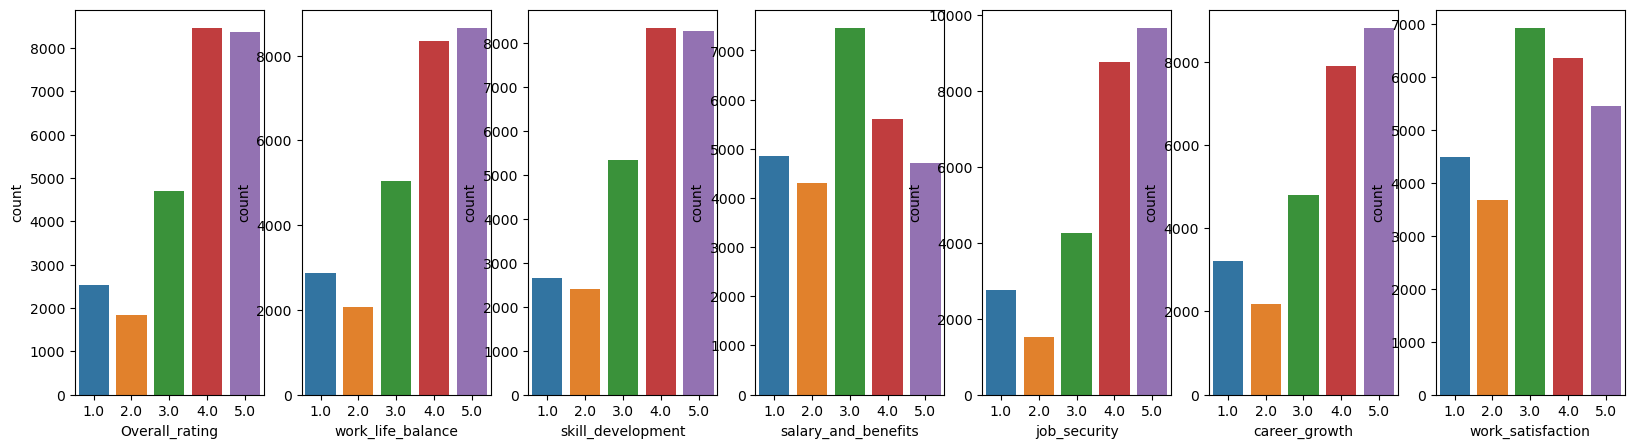

In [89]:
import seaborn as sns

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

fig, ax = plt.subplots(1, 7)
fig.set_size_inches(20, 5)
for index, column in enumerate(categorical_columns):
    sns.countplot(df, x=column, ax=ax[index])
fig.show()

### Aggregate Ratings

We have a nice bell curve with 2 outliers for the highest and near lowest rankings.

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\824947869.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


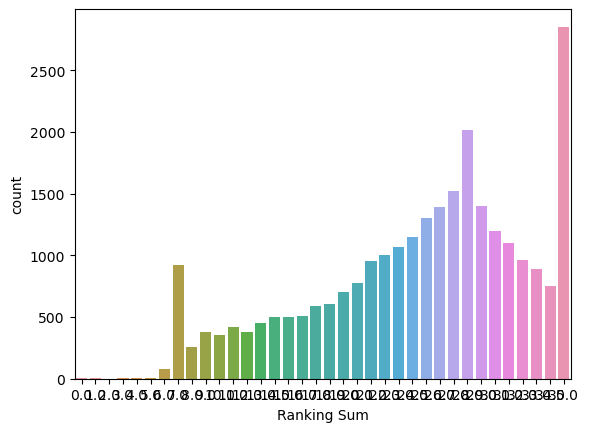

In [90]:
import seaborn as sns

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

category_total = df[categorical_columns].sum(axis=1)
df_category_total = pd.DataFrame({"Ranking Sum": category_total})
sns.countplot(df_category_total, x="Ranking Sum")
fig.show()

### Job Types

Virtually everyone is full time.  

count         11556
unique            5
top       Full Time
freq          11340
Name: Job_type, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


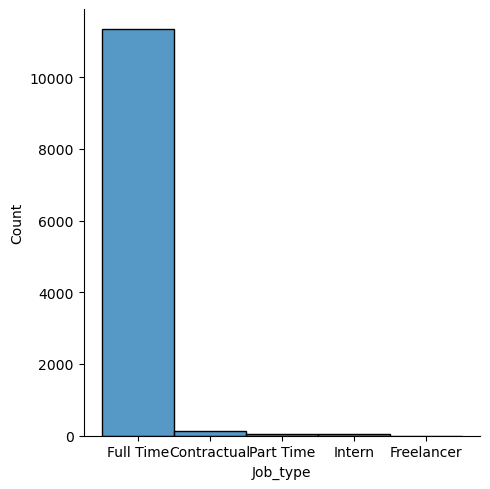

In [91]:
print(df["Job_type"].describe())
sns.displot(df["Job_type"])

### Departments

count                               22083
unique                                619
top       Software Development Department
freq                                 8936
Name: Department, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

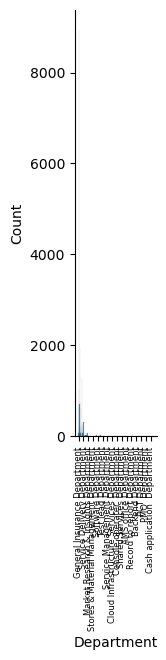

In [94]:
print(df["Department"].describe())
plt.figure(figsize=(12, 8))
sns.displot(df["Department"])

x_labels = df["Department"].unique()[::40]  # Adjust
x_ticks = range(0, len(x_labels) * 40, 40)  # tick placement
plt.xticks(x_ticks, x_labels, rotation=90, fontsize=6)  # label rotation, fontsize

plt.show()

### Places

count         24597
unique          830
top       Bangalore
freq           2977
Name: Place, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

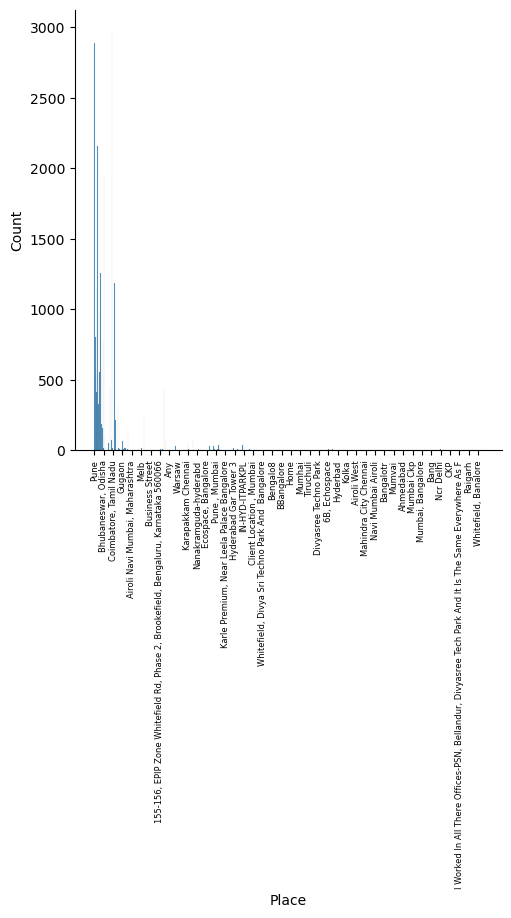

In [95]:
print(df["Place"].describe())
plt.figure(figsize=(6, 8))
sns.displot(df["Place"])

x_labels = df["Place"].unique()[::20]  # Adjust
x_ticks = range(0, len(x_labels) * 20, 20)  # tick placement
plt.xticks(x_ticks, x_labels, rotation=90, fontsize=6)  # label rotation, fontsize
plt.xlabel("Place")
plt.show()

### Titles

count                    25912
unique                    4239
top       Associate Consultant
freq                      3013
Name: Title, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

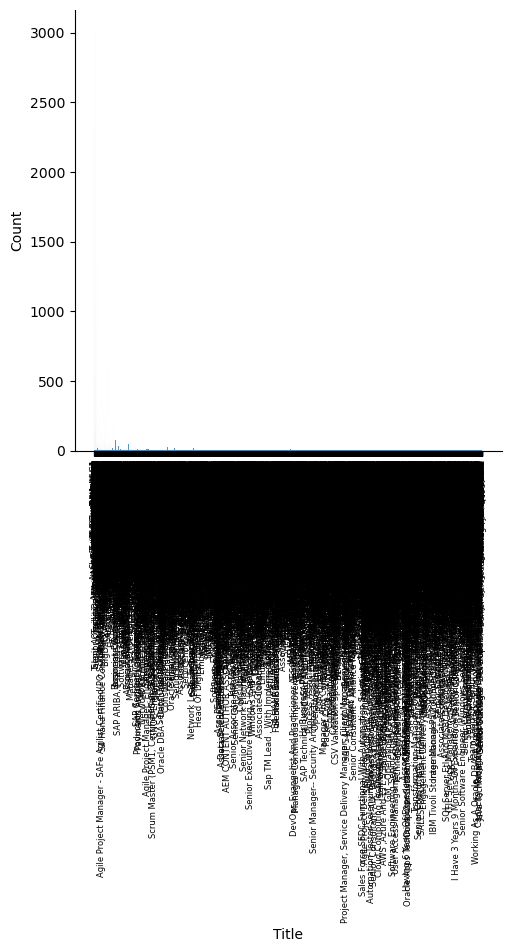

In [96]:
print(df["Title"].describe())
plt.figure(figsize=(6, 8))
sns.displot(df["Title"])

plt.xticks(rotation=90, fontsize=6)  # x label rotation
plt.xlabel("Title")
plt.show()

### Correlation of Ratings

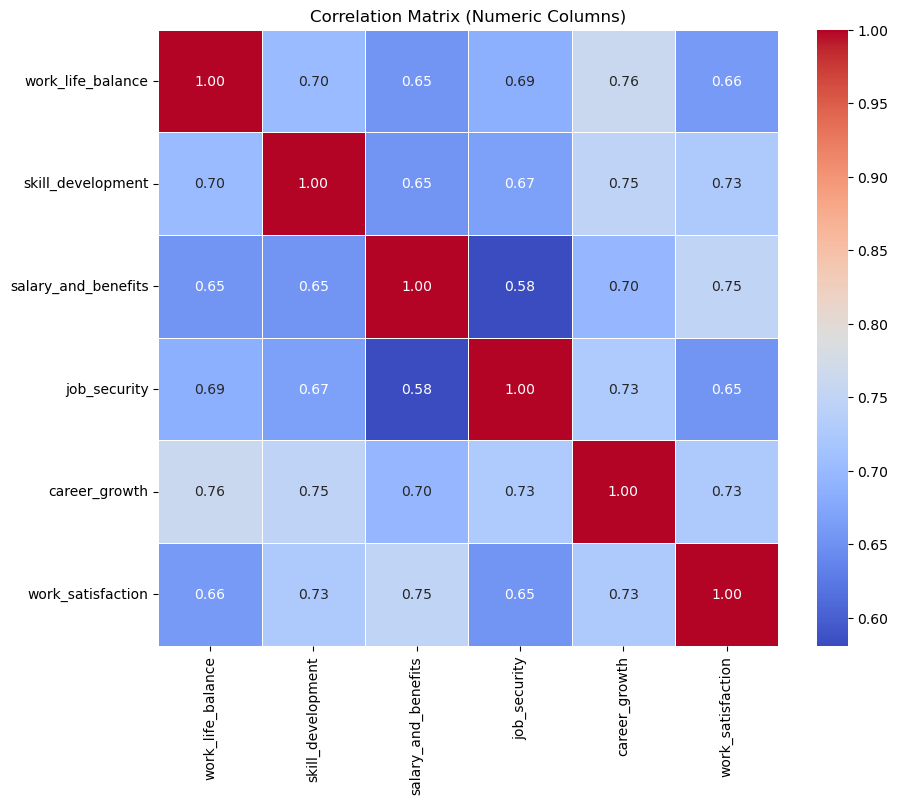

In [97]:
numeric_columns = df.iloc[:, 6:12].columns
numeric_corr = df[numeric_columns].corr()

# correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

In [98]:
import pandas as pd

rs = np.random.RandomState(0)
corr = df.corr() # We need to select numeric columns here!!!
corr.style.background_gradient()

ValueError: could not convert string to float: 'Senior Consultant'

In [99]:
ix = corr.sort_values("Overall_rating", ascending=False).index
ix = ix.drop("Overall_rating")
print(
    f"The self rankings with the highest to lowest correlation with Overall_rating are:"
)
ix.values

NameError: name 'corr' is not defined

In [317]:
print(
    f"The self rankings with the highest correlation are {ix[0]} and {ix[2]} with a correlation of {corr.loc[ix[0], ix[2]]}"
)

The self rankings with the highest correlation are career_growth and work_life_balance with a correlation of 0.7612514675083212


In [318]:
print(
    f"The self rankings with the lowest correlation are {ix[4]} and {ix[5]} with a correlation of {corr.loc[ix[4], ix[5]]}"
)

The self rankings with the lowest correlation are salary_and_benefits and job_security with a correlation of 0.5808948987666473


## Cleaning the data

### Remove rows where overall_rating is null
Drop rows with missing values in the column Overall_rating. Overall rating is the target column and required for classification.

In [100]:
# Title is almost always missing when overall rating is missing
before_drop = len(df.index)
df = df.dropna(subset=["Title", "Overall_rating"])
after_drop = len(df.index)
print(
    f"There were {before_drop} rows before dropping 'Overall_rating' and {after_drop} rows after dropping 'Overall_rating'"
)

There were 26993 rows before dropping 'Overall_rating' and 25895 rows after dropping 'Overall_rating'


### Impute Missing Data

In [101]:
# fill in empty values with NA
# fix Place data
no_place = {
    "..": "na",
    "any location": "na",
    "any": "na",
    "any place": "na",
    "client location ": "na",
    "client office": "na",
    "confidential": "na",
    "customer location": "na",
    "do not with to disclose": "na",
    "doesn" "t matter": "na",
    "everywhere": "na",
    "i don" "t know i did only internship only": "na",
    "no idea": "na",
    "office": "na",
    "somewhere": "na",
    "xyz": "na",
    "it's very good experience.": "na",
    "i don't know i did only internship only": "na",
}

outside_india = {
    "uk": "united kingdom",
    "usa": "united states",
    "sydneu": "sydney",
}

bangalore = {
    "6b bangalore": "bangalore",
    "6b ecospace": "bangalore",
    "6b": "bangalore",
    "bagalore": "bangalore",
    "baglore": "bangalore",
    "bamgalore": "bangalore",
    "banagalore": "bangalore",
    "banaglore": "bangalore",
    "bangaloe": "bangalore",
    "bangalor": "bangalore",
    "bangalore 6b": "bangalore",
    "bangalore dtp": "bangalore",
    "bangalore epip": "bangalore",
    "bangalore rural": "bangalore",
    "bangalore urban": "bangalore",
    "bangalore whitefield": "bangalore",
    "bangalore.": "bangalore",
    "bangalore/bengaluru": "bangalore",
    "bangalores": "bangalore",
    "bangalorr": "bangalore",
    "bangaluru": "bangalore",
    "banglore bmp": "bangalore",
    "banglore datacom": "bangalore",
    "banglore whitefield": "bangalore",
    "banglore": "bangalore",
    "bbangalore": "bangalore",
    "bengalore": "bangalore",
    "bengaluru": "bangalore",
    "bengaluru/bangalore": "bangalore",
    "benglore": "bangalore",
    "benguluru": "bangalore",
    "blore": "bangalore",
    "blr": "bangalore",
    "capgemini bangalore": "bangalore",
    "dtp bangalore": "bangalore",
    "dtp": "bangalore",
    "whietfield": "bangalore",
    "whiltefield": "bangalore",
    "whiltefield": "bangalore",
    "white feeld": "bangalore",
    "white field dtp": "bangalore",
    "white field summit towers a": "bangalore",
    "white field": "bangalore",
    "White Filed": "bangalore",
    "white filed": "bangalore",
    "whitefield bangalore": "bangalore",
    "whitefield": "bangalore",
    "whitefiled": "bangalore",
    "whitfield": "bangalore",
}

rest_of_india = {
    "hyderabad/secunderabad": "hyderabad",
    "hyderbad": "hyderabad",
    "hydrabad": "hyderabad",
    "hyder": "hyderabad",
    "hyd": "hyderabad",
    "navi mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "airoli mumbai": "mumbai",
    "mumbai airoli": "mumbai",
    "airoli navi mumbai": "mumbai",
    "airloi": "mumbai",
    "airoli sez": "mumbai",
    "airloi": "mumbai",
    "airoli,mumbai": "mumbai",
    "airoli,navi mumbai": "mumbai",
    "airolo": "mumbai",
    "airoli sez": "mumbai",
    "airoli west": "mumbai",
    "airoli,maharashtra": "mumbai",
    "airolo": "mumbai",
    "airoil mumbai": "mumbai",
    "airoli yosemite": "mumbai",
    "airoli mindspace": "mumbai",
    "airolii": "mumbai",
    "aeroli": "mumbai",
    "airoli mindspace": "mumbai",
    "new mumbai": "mumbai",
    "vikhroli": "vikhroli",
    "vikhroli - mumbai": "vikhroli",
    "vikhroli east": "vikhroli",
    "vikhroli,mumbai and airoli": "vikhroli",
    "vikroli": "vikhroli",
    "vikroholi": "vikhroli",
    "vikhroli office": "vikhroli",
    "vikhroli mumbai": "vikhroli",
    "vikhroli,mumbai": "vikhroli",
    "vikhrolli": "vikhroli",
    "vikhrolli": "vikhroli",
    "gurgaon/gurugram": "gurgaon",
    "gurugram": "gurgaon",
    "greater noida": "noida",
    "noida nsez": "noida",
    "nsez noida": "noida",
    "nsez": "noida",
    "noida sez": "noida",
    "new delhi": "delhi",
    "delhi ncr": "delhi",
    "talwade pune": "pune",
    "pune talwade": "pune",
    "punr": "pune",
    "hinjewadi pune": "pune",
    "pune hinjewadi": "pune",
    "chenani": "chennai",
    "trichy": "tiruchirappalli",
    "tiruchirapalli": "tiruchirappalli",
    "tiruchuli": "tiruchirappalli",
    "selam": "salem",
    "yasomite airoli": "yosemite airoli",
    "wfh (working remotely)": "remote",
    "work from home (working remotely)": "remote",
    "remote (working remotely)": "remote",
    "remotely": "remote",
    "although i am still working from home so it depends project to project": "remote",
    "home": "remote",
    "no i work from home only during vivid 29": "remote",
    "trich": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichy,vrn": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichirappalli": "tiruchirapalli",
    "talawade": "pune",
    "talwade": "pune",
    "pu ne": "pune",
    "pu e": "pune",
    "pu": "pune",
    "talvade pune": "pune",
    "talwadde": "pune",
    "talawde": "pune",
    "pune,talawade": "pune",
    "talawade,pune": "pune",
    "pube": "pune",
    "talwade,pune": "pune",
    "talawade pune": "pune",
    "talwade pune. depend it" "s chandes": "pune",
}

all_places = no_place | outside_india | bangalore | rest_of_india


df["Place"] = df["Place"].fillna("na").apply(lambda x: x.lower().split(", ")[0])
df["Place"] = df["Place"].replace(all_places)


# where Place is NA and titla contains the phrase "Remotely" we can assume they work remotely for their Place.
def isRemoteTitle(title, place):
    if "na" == place and "Remotely".casefold() in title.casefold():
        return "remote"
    else:
        return place


df["Place"] = df.apply(lambda x: isRemoteTitle(x.Title, x.Place), axis=1)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2861261583.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"] = df["Place"].fillna("na").apply(lambda x: x.lower().split(", ")[0])
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2861261583.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"] = df["Place"].replace(all_places)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2861261583.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

### Make Title info consistent

In [102]:
# make casing consistent
# replace Sr./Sr with Senior and fix missing spaces
df["Title"] = df["Title"].str.lower()
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr ", "senior ")
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr", "senior")
df["Title"] = df["Title"].str.replace("operation ", "operations ")
df["Title"] = df["Title"].str.replace("human resource", "hr")
df["Title"] = df["Title"].str.replace("human resources", "hr")


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\325491317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].str.lower()
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\325491317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].str.replace("sr. ", "senior ")
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\325491317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

### Tokenize Titles

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
# without min_df the vectorizer will include words that only appear once
# found min_df=0.0001 to be a good value
count_vect = CountVectorizer(stop_words="english", min_df=0.0001)
X_train_counts = count_vect.fit_transform(df["Title"])
count_array = X_train_counts.toarray()
token_df = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())

# if there are overlapping column names, drop them
token_df = token_df.drop(df.columns, axis=1, errors="ignore")

df = df.join(token_df)

df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,...,wfm,windows,wintel,wlan,wm,work,workday,working,writer,years
0,senior consultant,pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,senior software engineer,kolkata,Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,senior consultant,bangalore,Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,senior consultant,pune,Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,team lead,noida,Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Parse Dates and fill in missing ones

In [104]:
def get_date(x):
    try:
        return str(x)[2:]
    except:
        return "None"


df["Date"] = df["Date"].fillna("0 None").apply(get_date)
df["Date"] = pd.to_datetime(df["Date"], format="%b %Y", errors="raise")

### Fill missing 'rating data' with Frequent value

In [105]:
# Set ratings as categorical data
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

rating_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in rating_columns:
    imputer = SimpleImputer(strategy="most_frequent")
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype("float64")

### Fill missing 'Job Types' with Frequent value

In [80]:
df

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,...,wfm,windows,wintel,wlan,wm,work,workday,working,writer,years
0,senior consultant,pune,Full Time,General Insurance Department,2023-09-01,4.0,4.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,senior software engineer,kolkata,Full Time,Software Development Department,2023-09-01,3.0,4.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,senior consultant,bangalore,Full Time,Software Development Department,2023-09-01,4.0,4.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,senior consultant,pune,Full Time,Banking Operations Department,2023-09-01,1.0,2.0,4.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,team lead,noida,Full Time,IT Infrastructure Services Department,2023-09-01,4.0,5.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26971,project manager,bangalore,NaN,Technology / IT Department,2018-05-01,2.0,3.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26972,v and v test lead,mumbai,NaN,Software Development Department,2018-05-01,5.0,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26973,manager it operations,noida,NaN,IT Support Department,2018-03-01,4.0,5.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26974,consultant,na,NaN,Software Development Department,2017-08-01,5.0,4.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Set job_type
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

job_type_columns = ["Job_type"]

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in job_type_columns:
    imputer = SimpleImputer(strategy="most_frequent")
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype("string")

for column in job_type_columns:
    df[column] = df[column].astype("string")

ValueError: 2

In [107]:
# Set rest of columns as strings
string_columns = ["Title", "Place", "Department", "Likes", "Dislikes"]

for column in string_columns:
    df[column] = df[column].astype("string")

In [109]:
print("Data after preperation")
df.info()

df.to_csv("data/Capgemini_Employee_Reviews_from_AmbitionBox_cleaned.csv", index=False)

Data after preperation
<class 'pandas.core.frame.DataFrame'>
Index: 25895 entries, 0 to 26975
Columns: 554 entries, Title to years
dtypes: datetime64[ns](1), float64(547), object(1), string(5)
memory usage: 110.7+ MB


In [110]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [112]:
# number of unique records, total records and column data type
for col in df.columns[:14]:
    a = col, len(df[col].unique()), len(df[col])
    b = df[col].dtypes
    print(a, b)

('Title', 4175, 25895) string
('Place', 531, 25895) string
('Job_type', 6, 25895) object
('Department', 620, 25895) string
('Date', 74, 25895) datetime64[ns]
('Overall_rating', 5, 25895) float64
('work_life_balance', 5, 25895) float64
('skill_development', 5, 25895) float64
('salary_and_benefits', 5, 25895) float64
('job_security', 5, 25895) float64
('career_growth', 5, 25895) float64
('work_satisfaction', 5, 25895) float64
('Likes', 17496, 25895) string
('Dislikes', 17550, 25895) string


In [113]:
df.describe()

,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,02,365,...,wfm,windows,wintel,wlan,wm,work,workday,working,writer,years
count,25895,25895.000000,25895.000000,25895.000000,25895.00000,25895.000000,25895.000000,25895.000000,24976.000000,24976.000000,...,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000,24976.000000
mean,2021-05-20 19:45:38.613632,3.707241,3.677891,3.650859,3.04916,3.799189,3.643020,3.177254,0.000160,0.000120,...,0.000440,0.001081,0.000320,0.000120,0.000721,0.000160,0.000120,0.021621,0.001922,0.000400
min,2017-08-01 00:00:00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-06-01 00:00:00,3.000000,3.000000,3.000000,2.00000,3.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-04-01 00:00:00,4.000000,4.000000,4.000000,3.00000,4.000000,4.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-12-01 00:00:00,5.000000,5.000000,5.000000,4.00000,5.000000,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-09-01 00:00:00,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
std,NaN,1.257243,1.282375,1.264789,1.33314,1.261508,1.325407,1.346657,0.012654,0.010959,...,0.020982,0.032862,0.017895,0.010959,0.026837,0.012654,0.010959,0.145445,0.043798,0.021916


# Yonghee - Processing end

# Yonghee - Likes, Dislikes -> Vector

In [114]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download("punkt")  # nltk data download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

punkt: pre Trained dataset for Word2Vec model

Meaning of each Parameter of Word2Vec model:
- sentences: List of tokenized sentences.
- vector_size: Size of the vectors for each word(=dimension), Normally Middle size = 100
- window: Size of the context window considered by the model.
- min_count: Minimum frequency for a word to be included in the model.
- workers: Number of CPU cores used for model training.

When creating a Word2Vec model, parameters set as below. 

* sentences=tokenized_likes: It represents a list of tokenized sentences used for model training.
* vector_size=100: It indicates the size of the vectors for each word. A larger vector size can capture more abstract features but comes with increased computational cost, so an appropriate size, such as 100, is commonly used.
* window=5: It denotes the size of the context window, specifying the number of words considered around a given word. For example, with window=5, up to five words before and after each word are taken into account.
* min_count=1: It is the minimum frequency required for a word to be included in the model. This setting avoids including words with very low frequencies in the model.
* workers=4: It represents the number of CPU cores used for model training. Parallel processing can speed up training, and it's generally recommended to set it according to the number of available CPU cores.

The vector_size parameter represents the size or dimension of the vectors assigned to each word. Therefore, vector_size=100 means representing each word as a 100-dimensional vector. A larger vector size creates a larger and more complex representation space for words. While larger vector sizes can provide more sophisticated representations, they come with higher computational costs and a risk of overfitting, especially with limited data. Thus, choosing an appropriate vector size is crucial.
Additionally, word embedding technologies like Word2Vec are trained to capture semantic similarity between words. However, each dimension of the vectors does not have a direct interpretable meaning. Each dimension represents specific word features learned by the model. As a result, interpreting the exact meaning of each dimension can be challenging.

In [116]:
# Likes Column's Blank -> ' '
df["Likes"] = df["Likes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_likes = df["Likes"].apply(word_tokenize)

# Word2Vec model - Need to choose the 'Vector size'
word2vec_model = Word2Vec(
    sentences=tokenized_likes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector
word_vectors = word2vec_model.wv

# make 'Sentence Vectors'
sentence_vectors = tokenized_likes.apply(
    lambda x: np.mean(
        [word_vectors[token] for token in x if token in word_vectors], axis=0
    )
)

# Add 'Sentece_Vector' to dataframe
max_dimensions = max(
    sentence_vectors.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
)
for i in range(max_dimensions):
    df[f"Likes_vector_{i}"] = sentence_vectors.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2714510915.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Likes_vector_{i}"] = sentence_vectors.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\2714510915.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Likes_vector_{i}"] = sentence_vectors.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipy

In [117]:
# Dislikes Column's Blank -> ' '
df["Dislikes"] = df["Dislikes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_dislikes = df["Dislikes"].apply(word_tokenize)

# Word2Vec model for Dislikes
word2vec_model_dislikes = Word2Vec(
    sentences=tokenized_dislikes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector for Dislikes
word_vectors_dislikes = word2vec_model_dislikes.wv

# Make 'Sentence Vectors' for Dislikes
sentence_vectors_dislikes = tokenized_dislikes.apply(
    lambda x: np.mean(
        [word_vectors_dislikes[token] for token in x if token in word_vectors_dislikes],
        axis=0,
    )
)

# Add 'Sentence_Vector' for Dislikes to DataFrame
max_dimensions_dislikes = max(
    sentence_vectors_dislikes.apply(
        lambda x: len(x) if isinstance(x, np.ndarray) else 0
    )
)
for i in range(max_dimensions_dislikes):
    df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUN

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\4058450130.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [120]:
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력

column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

,Columns
0,Title
1,Place
2,Job_type
3,Department
4,Date
5,Overall_rating
6,work_life_balance
7,skill_development
8,salary_and_benefits
9,job_security



<b> We plan to explore the following machine learning models:

### Classifiers:

<b>LogisticRegression
    
<b>SVC

<b>LinearSVC

<b>KNeighborsClassifier

<b>DecisionTreeClassifier

<b>RandomForestClassifier

<b>GaussianNB

<b>Perceptron
    
<b>SGDClassifier</b>

The database will be split 80% for training and 20% for testing.

<b>Precision score, Accuracy factors and F1 score</b> will be calculated to validate the success of the model training

# Division of Labor

Our initial plan is as follows:

Data Cleaning: Data cleaning, addressing missing data and outliers.

Feature Engineering: Focus on feature selection and engineering.

Modeling: Implementation and comparison of the chosen models.

Validation: Model validation and utilizing cross-validation techniques.

Hyperparameter Tuning: Optimization of model parameters as needed.

<b>Here is the initial role of each team member</b>:


# Jace Rhea

### Model Selection
### Data Analysis and Cleaning
### Project coordination

# Yonghee Kim

### Model Selection
### Data Analysis and Cleaning
### Model Training

# Yu Zhou

### Feature Engineering
### Hyper Parameter Tuning

# Nabil Sleiman

### Model Selection
### Model Evaluation
### Model Validation
### Presentation

Even though we outlined our initial plan, we are <b>prepared to adapt as the project evolves</b> and more insights are gained from the data and models.